In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
import tensorflow as tf
import tensorflow.keras as keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import datetime as dt
from datetime import datetime

from tkinter import *
import tkinter.font as font

In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)
  # fix random seed for reproducibility 1lBdJbC0TXdaVmqkM9TZqnPvwn2fke8cQ  1XDqHh0tFbQ3CJAWLRf87M8WqeES2Vu4v 
  

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

Downloading...
From: https://drive.google.com/uc?id=1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_
To: /content/revenue.csv
100% 186k/186k [00:00<00:00, 54.5MB/s]


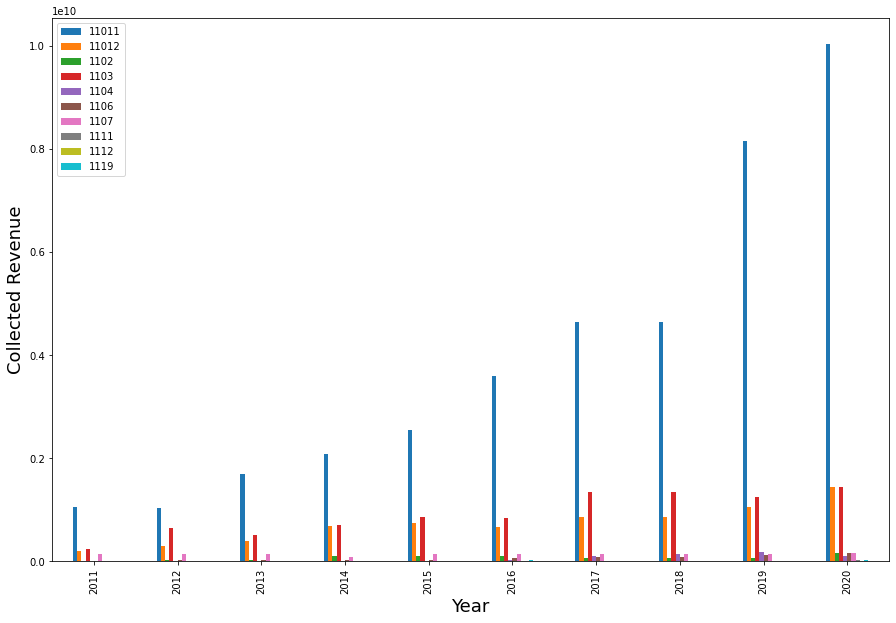

,total,11011,11012,1102,1103,1104,1106,1107,1108,1111,1112,1119,1121,1122,1123,1124,1125,1126,1127,1128,1129,1131,1132,1133,1134,1135,1136,1137,1138,1139,1141,1142,1143,1144,1169,1171,1172,1173,1174,1175,...,1433,1434,1435,1436,1437,1438,1439,1441,1442,1443,1444,1445,1446,1451,1453,1455,1456,1459,1460-1470,1464,1465,1468,1469,1479,1480,1481,1482,1483,1489,1500,1501,1502,1503,1504,1505,1506,Month,Year,Date,quarter
datee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-28,188476007.5,5.108741e+07,2.125167e+07,3527250.184,4.355629e+07,24183.20167,624751.2658,9607927.8,718851.7675,85659.75,68220.41,57007.6975,0.0,27351.66917,288049.65,22272.91917,273.540833,5815.428333,79639.75333,10227.05083,5989043.737,27734.945,4335.05,10215.21,262.284167,4713.130833,6701.939167,1438.446667,320.736667,9563.406667,12226.20417,12108.67833,4862.791667,27626.29583,1.003182e+07,5055.75875,0.0,4796.093333,59510.42667,9706.466667,...,468451.0683,1016649.203,29889.219170,1169792.82,275864.6633,83502.16,377126.5992,12644.104170,32202.89333,437909.4733,1557.333333,33220.28333,714.083333,640490.17,724.25,389299.0817,166041.0842,95934.40917,2.744043e+05,12693.6725,29146.636670,6984449.972,95883.28,156578.5825,4571852.705,38333.125,0.0,0.0,4533519.58,2952.58,1373.4175,962.704167,616.458333,0,0,0,1,2011,2011-01-28,1
2011-02-28,140034423.5,8.571904e+07,1.681022e+07,4887744.582,4.589000e+07,23873.20167,663858.4158,9610044.8,707693.8775,85349.75,67910.41,72904.7675,0.0,31174.51917,308330.65,26337.59917,803.540833,9880.108333,83704.43333,14291.73083,5305960.527,31799.625,8399.73,14279.89,632.284167,8777.810833,12738.919170,7475.426667,6470.736667,13812.406670,16290.88417,16173.35833,8927.471667,35788.12583,7.698519e+05,9120.43875,0.0,8860.773333,63575.10667,13771.146670,...,204138.3883,1237745.813,5423.199167,1158381.09,263491.8133,79630.66,383363.3892,19870.104170,39428.89333,173596.7933,1197.333333,23350.07333,384.083333,629078.44,394.25,124986.4017,161552.7842,88503.01917,3.187492e+05,19919.6725,4680.616667,6988296.912,88451.89,152090.2825,4990587.805,28462.915,0.0,0.0,4962124.89,2952.58,1373.4175,962.704167,616.458333,0,0,0,2,2011,2011-02-28,1
2011-03-28,168445922.3,7.651268e+07,9.817854e+06,1093844.260,2.083219e+07,25123.20167,719356.9758,9608777.8,802966.7275,86599.75,69160.41,37557.6975,0.0,32089.21917,486105.57,53753.91917,388.540833,37296.428330,111120.75330,41708.05083,5923788.827,59215.945,35816.05,41696.21,1262.284167,36194.130830,40155.239170,34891.746670,3520.736667,41044.406670,43707.20417,43589.67833,36343.791670,28702.53583,5.598471e+05,36536.75875,0.0,36277.093330,90991.42667,41187.466670,...,187776.7883,1241669.573,4406.399167,1141612.11,261107.0633,72039.66,367060.3792,23136.104170,42694.89333,157235.1933,877.333333,18395.83333,862.083333,612309.46,872.25,108624.8017,231362.6842,88434.81917,1.749796e+05,23185.6725,3663.816667,6971761.972,88383.69,221900.1825,4893939.505,23508.675,0.0,0.0,4870430.83,2952.58,1373.4175,962.704167,616.458333,0,0,0,3,2011,2011-03-28,1
2011-04-28,217449074.0,1.227449e+08,1.687219e+07,1733012.695,4.996473e+07,24061.20167,945663.8358,9656509.8,783164.6275,85537.75,68098.41,36495.6975,0.0,38025.48917,355814.82,27212.91917,1223.540833,10755.428330,84579.75333,15167.05083,5677908.827,32674.945,9275.05,15155.21,524.284167,9653.130833,13614.239170,8350.746667,7550.736667,29520.406670,17166.20417,17048.67833,9802.791667,28803.55583,5.472564e+05,9995.75875,0.0,9736.093333,64450.42667,14646.466670,...,206920.8883,1258809.573,2866.299167,1127872.29,260381.9633,73271.16,389566.9592,9874.104167,29432.89333,176379.2933,938.333333,46585.84333,894.083333,598569.64,904.25,127768.9017,162836.2342,95521.28917,1.183543e+06,9923.6725,2123.716667,7098516.622,95470.16,153373.7325,4990111.125,51698.685,0.0,0.0,4938412.44,2952.58,1373.4175,962.704167,616.458333,0,0,0,4,2011,2011-04-28,2
2011-05-28,183884741.4,1.217815e+08,1.676290e+07,1529940.126,7.181197e+06,23503.64167,694174.9458,10420304.8,732035

In [ ]:
!gdown --id 1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_ --output revenue.csv
dataframe = read_csv('revenue.csv' , engine='python')
dataset = dataframe.values
dataset = dataframe
dataset["Month"] = pd.to_datetime(dataframe["datee"]).dt.month
dataset["Year"] = pd.to_datetime(dataframe["datee"]).dt.year
dataset["Date"] = pd.to_datetime(dataframe["datee"]).dt.date
dataset["quarter"]=pd.to_datetime(dataframe['datee']).dt.quarter
dataset = dataframe.set_index("datee")
dataset.index = pd.to_datetime(dataset.index)
df_year = dataframe[['Year','11011','11012','1102','1103','1104','1106','1107','1111','1112','1119']].groupby(by='Year').sum().reset_index()
df_year
fig, ax = plt.subplots(figsize=(15,10))
df_year.set_index('Year').plot(kind='bar',ax=ax)
# ax1 = fig.add_subplot(111)
ax.set_ylabel('Collected Revenue',size=18)
ax.set_xlabel('Year',size=18)
plt.show()
dataset.head(5)

In [ ]:
!gdown --id 1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_ --output revenue.csv
dataframe = read_csv('revenue.csv' , usecols=[0,3],parse_dates=['datee'],index_col='datee', engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

Downloading...
From: https://drive.google.com/uc?id=1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_
To: /content/revenue.csv
100% 186k/186k [00:00<00:00, 59.4MB/s]


In [ ]:
dataset

array([[2.1251674e+07],
       [1.6810222e+07],
       [9.8178540e+06],
       [1.6872190e+07],
       [1.6762897e+07],
       [1.0952814e+07],
       [1.2787641e+07],
       [1.5291924e+07],
       [1.6568624e+07],
       [1.5876227e+07],
       [2.3142960e+07],
       [1.8408124e+07],
       [2.8552556e+07],
       [2.0217826e+07],
       [2.3481306e+07],
       [1.6438587e+07],
       [2.6528740e+07],
       [2.7535792e+07],
       [2.4068862e+07],
       [2.4354680e+07],
       [3.2360194e+07],
       [2.3481306e+07],
       [2.8552556e+07],
       [2.6528740e+07],
       [2.3481306e+07],
       [2.7535792e+07],
       [2.9525744e+07],
       [2.8067848e+07],
       [3.1175718e+07],
       [3.3105378e+07],
       [3.1196282e+07],
       [3.1506812e+07],
       [4.0199128e+07],
       [3.8466068e+07],
       [4.4116112e+07],
       [3.8203508e+07],
       [7.2113832e+07],
       [6.1629224e+07],
       [6.5914076e+07],
       [6.0470404e+07],
       [4.9911536e+07],
       [2.965153

In [ ]:
# Check if revenue series is stationary
from statsmodels.tsa.stattools import adfuller
result=adfuller(dataframe['11012'], autolag = 'AIC')
# result = adfuller(df.close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.5393282934567505
p-value: 0.9860206801301191


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe.describe()

,11012
count,1.170000e+02
mean,5.853266e+07
std,3.067196e+07
min,9.817854e+06
25%,3.117572e+07
50%,6.051214e+07
75%,7.697829e+07
max,1.459457e+08


In [ ]:

dataframe.head(5)

,11012
datee,
2011-01-28,2.125167e+07
2011-02-28,1.681022e+07
2011-03-28,9.817854e+06
2011-04-28,1.687219e+07
2011-05-28,1.676290e+07


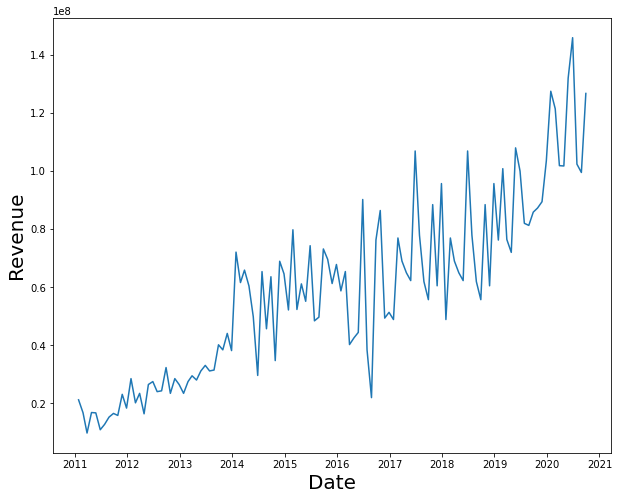

In [ ]:
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date',size=20)
ax1.set_ylabel('Revenue',size=20)
plt.plot(dataframe)
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
test.shape

(24, 1)

In [ ]:
look_back =1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1,testX.shape[1]))

In [ ]:
trainY.shape

(91,)

In [ ]:
testX.shape

(22, 1, 1)

In [ ]:
testY.shape

(22,)

In [ ]:
model = Sequential()
model.add(LSTM(units=4,activation="relu",return_sequences=True,input_shape=(look_back,1)))
# Adding 2nd LSTM layer
model.add(LSTM(units=2,return_sequences=False))
# Adding 3rd lstm layer
# model.add(LSTM(units=1,return_sequences=False))
# adding dropout
# model.add(Dropout(0.2))
# Output layer
model.add(Dense(units=1))

In [ ]:

%%time
es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True)
# callbacks=[es, rlr, mcp, tb],
tb = TensorBoard('logs')
# model.compile(loss= 'mean_squared_error' , optimizer= 'adam' m )
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanSquaredError()])
history=model.fit(trainX, trainY, epochs=50,batch_size=1,verbose=2,validation_split=0.033,shuffle=False)

Epoch 1/50
87/87 - 3s - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 2/50
87/87 - 0s - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 3/50
87/87 - 0s - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 4/50
87/87 - 0s - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0555 - val_mean_squared_error: 0.0555
Epoch 5/50
87/87 - 0s - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 6/50
87/87 - 0s - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 7/50
87/87 - 0s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 8/50
87/87 - 0s - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 9/50
87/87 - 0s - loss: 0.0271 - mean_squared_erro

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 4)              96        
_________________________________________________________________
lstm_1 (LSTM)                (None, 2)                 56        
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


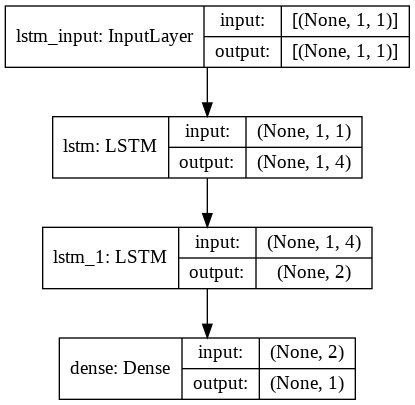

In [ ]:
tf.keras.utils.plot_model(model, "Revenue_LSTM_Model.png", show_shapes=True)

In [ ]:
# Estimate model performance

_, trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
_, testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.02 MSE (0.13 RMSE)
Test Score: 0.03 MSE (0.17 RMSE)


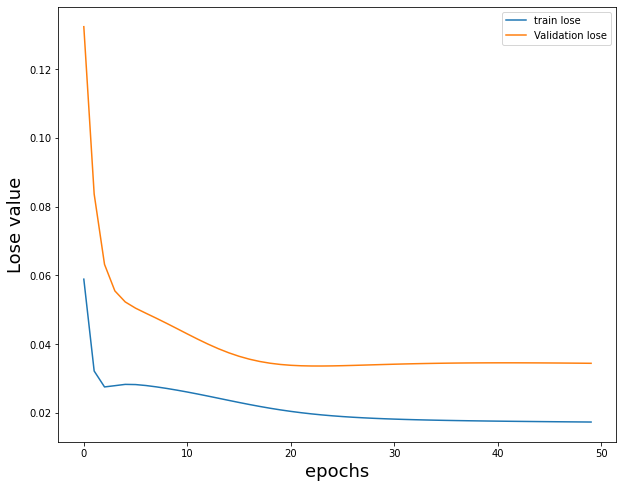

In [ ]:
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('epochs',size =18)
ax1.set_ylabel('Lose value',size=18)
plt.plot(history.history['loss'],label='train lose')
plt.plot(history.history['val_loss'],label='Validation lose')
plt.legend()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_log_error(trainY[0], trainPredict[:,0]))
print('trainY values')
print(trainY[0])
print('trainPredict values')
print(trainPredict[:,0])
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_log_error(testY[0], testPredict[:,0]))
print('testY values')
print(testY[0])
print('testPredict values')
print(testPredict[:,0])
# print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


trainY values
[1.68102221e+07 9.81785367e+06 1.68721896e+07 1.67628971e+07
 1.09528140e+07 1.27876407e+07 1.52919239e+07 1.65686241e+07
 1.58762266e+07 2.31429599e+07 1.84081243e+07 2.85525564e+07
 2.02178254e+07 2.34813054e+07 1.64385875e+07 2.65287400e+07
 2.75357936e+07 2.40688618e+07 2.43546803e+07 3.23601959e+07
 2.34813054e+07 2.85525564e+07 2.65287400e+07 2.34813054e+07
 2.75357936e+07 2.95257439e+07 2.80678472e+07 3.11757197e+07
 3.31053760e+07 3.11962802e+07 3.15068135e+07 4.01991291e+07
 3.84660673e+07 4.41161148e+07 3.82035072e+07 7.21138370e+07
 6.16292246e+07 6.59140762e+07 6.04704045e+07 4.99115382e+07
 2.96515369e+07 6.54020070e+07 4.57181013e+07 6.36338894e+07
 3.47636564e+07 6.89657360e+07 6.46372360e+07 5.21984797e+07
 7.98072564e+07 5.23655885e+07 6.11725528e+07 5.51801292e+07
 7.43193520e+07 4.84519092e+07 4.97193332e+07 7.32021316e+07
 6.96405081e+07 6.12950476e+07 6.78515785e+07 5.87665242e+07
 6.54240848e+07 4.02761782e+07 4.25917332e+07 4.44609535e+07
 9.0232962

In [ ]:
dataset=scaler.inverse_transform(dataset)
df= pd.DataFrame(dataset)
trainPredictPlot=pd.DataFrame(trainPredictPlot)
testPredictPlot=pd.DataFrame(testPredictPlot)
!gdown --id 1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_ --output revenue.csv
dfgraph = read_csv('revenue.csv',parse_dates=['datee'])
dfgraph.columns
dfgraph.set_index('datee',inplace=True)

# dfgraph['datee']=pd.to_datetime([dfgraph['datee']])
df.set_index(dfgraph.index[3:],inplace=True)
trainPredictPlot.set_index(dfgraph.index[3:],inplace=True)
testPredictPlot.set_index(dfgraph.index[3:],inplace=True)

Downloading...
From: https://drive.google.com/uc?id=1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_
To: /content/revenue.csv
100% 186k/186k [00:00<00:00, 52.0MB/s]


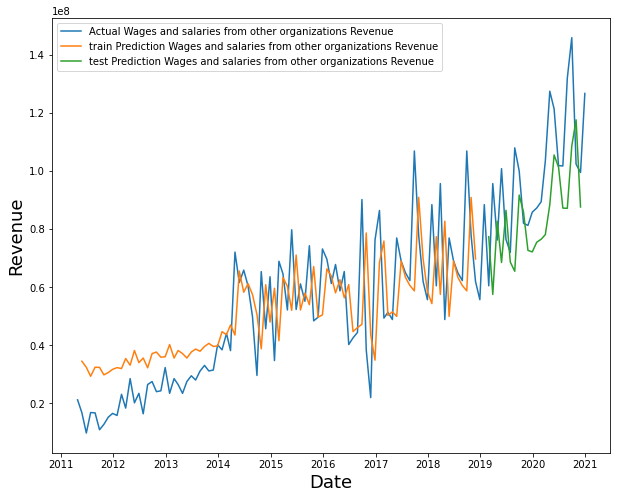

In [ ]:
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date',size=18)
ax1.set_ylabel('Revenue',size=18)
plt.plot(df,label='Actual Wages and salaries from other organizations Revenue')
plt.plot(trainPredictPlot,label='train Prediction Wages and salaries from other organizations Revenue')
plt.plot(testPredictPlot,label='test Prediction Wages and salaries from other organizations Revenue')
plt.legend()
plt.show()

In [ ]:
model.save('ANRSRBLSTMPR.h5')

### Model Prediction With Saved **Model**

In [ ]:
from keras.models import load_model
model2 = load_model('ANRSRBLSTMPR.h5')
!gdown --id 1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_ --output savedrevenue.csv
# from google.colab import files
# uploaded = files.upload()
dataframeSaved = read_csv('savedrevenue.csv' , usecols=[0,1],parse_dates=['datee'],index_col='datee', engine='python')
datasetSaved = dataframeSaved.values
datasetSaved = datasetSaved.astype('float32')

scaler2 = MinMaxScaler(feature_range=(0, 1))
datasetSaved = scaler2.fit_transform(datasetSaved)

look_back =1
testXSaved, testYSaved = create_dataset(datasetSaved, look_back)
# reshape input to be [samples, time steps, features]
testXSaved = numpy.reshape(datasetSaved, (datasetSaved.shape[0], datasetSaved.shape[1], 1))

NewPredictSaved = model2.predict(testXSaved)

Downloading...
From: https://drive.google.com/uc?id=1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_
To: /content/savedrevenue.csv
100% 186k/186k [00:00<00:00, 1.73MB/s]


In [ ]:
_, modelScoreSaved = model.evaluate(testXSaved[2:], testYSaved, verbose=0)
print('Saved Model Score: %.2f MSE (%.2f RMSE)' % (modelScoreSaved, math.sqrt(modelScoreSaved)))

Saved Model Score: 0.01 MSE (0.11 RMSE)


In [ ]:
NewPredictSavedIn=scaler2.inverse_transform(NewPredictSaved)
datasetSavedIn=scaler2.inverse_transform(datasetSaved)

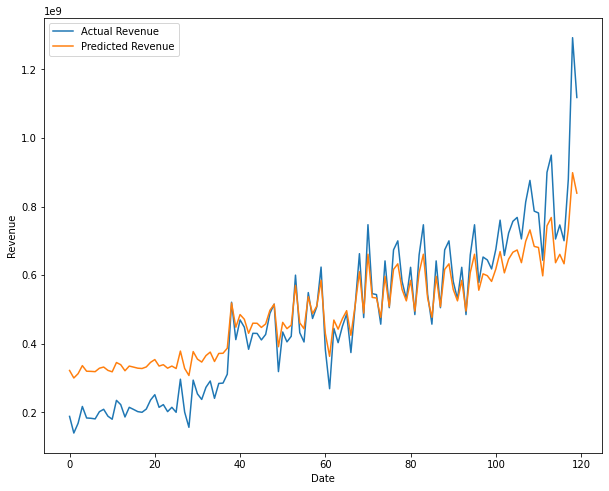

In [ ]:
# shift test predictions for plotting
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue')
plt.plot(datasetSavedIn,label='Actual Revenue')
plt.plot(NewPredictSavedIn,label='Predicted Revenue')
plt.legend()
plt.show()


## **Model Prediction From user data**

In [ ]:
from keras.models import load_model
model2 = load_model('ANRSRBLSTMPR.h5')
# !gdown --id 1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_ --output savedrevenue.csv
from google.colab import files
uploaded = files.upload()
dataframe2 = read_csv('ANRS Revenue Data Transposed1.csv' , usecols=[0,1],parse_dates=['datee'],index_col='datee', engine='python')
dataset2 = dataframe2.values
dataset2 = dataset2.astype('float32')

scaler2 = MinMaxScaler(feature_range=(0, 1))
dataset3 = scaler2.fit_transform(dataset2)

look_back =1
testX2, testY2 = create_dataset(dataset3, look_back)
# reshape input to be [samples, time steps, features]
testX2 = numpy.reshape(dataset3, (dataset3.shape[0], dataset3.shape[1], 1))

NewPredict = model2.predict(testX2[48:])

In [ ]:
_, modelScore = model.evaluate(testX2[2:], testY2, verbose=0)
print('Saved Model Score: %.2f MSE (%.2f RMSE)' % (modelScore, math.sqrt(modelScore)))

In [ ]:
NewPredictin=scaler.inverse_transform(NewPredict)


In [ ]:
# shift test predictions for plotting
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue')
plt.plot(dataset2[48:],label='Actual Revenue')
plt.plot(NewPredictin,label='Predicted Revenue')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
print(('Actual:        Predicted'))
df1 = "\n".join("{} {}".format(dataset2, NewPredictin) for dataset2, NewPredictin in zip(dataset2,NewPredictin))
print(df1)

## **Future Revenue Forecasting**

In [ ]:
!gdown --id 1nMekqw97uTbbGW5P3Ay5h1PNwbkloGa_ --output directtax.csv
dataset_train = pd.read_csv('directtax.csv' ,engine='python',skipfooter=1)
# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['datee'])
# orig_date = str(dataset_train['datee'])
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]
# Generate list of sequence of days for predictions
num = input("Enter number of months of revenue to be predicted  :") 
datelist_future = pd.date_range(datelist_train[-1], periods=int(num), freq='1m').tolist()
datelist_future_ = []
for this_timestamp in datelist_future:
     datelist_future_.append(this_timestamp.date())

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%M'), '%Y%M')
scaler2 = MinMaxScaler(feature_range=(0, 1))
dataset3 = scaler2.fit_transform(dataset2)

look_back =1
testX2, testY2 = create_dataset(dataset3, look_back)
# reshape input to be [samples, time steps, features]
testX2 = numpy.reshape(dataset3, (dataset3.shape[0], dataset3.shape[1], 1))

predictions_future = model.predict(testX2[-12:])

In [ ]:
_, modelScore = model.evaluate(testX2[2:], testY2, verbose=0)
print('Saved Model Score: %.2f MSE (%.2f RMSE)' % (modelScore, math.sqrt(modelScore)))

In [ ]:
predictions_future_list=scaler.inverse_transform(predictions_future)

PREDICTIONS_FUTURE = pd.DataFrame(predictions_future_list, columns=['total']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE.head(12)